In [93]:
import pandas as pd
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import re
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
import pickle
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

In [94]:
with open("ccdf2.pkl", 'rb') as picklefile: 
    ccdf = pickle.load(picklefile)

In [95]:
with open("ccdf_upsampled.pkl", 'rb') as picklefile: 
    ccdf_up = pickle.load(picklefile)

In [96]:
with open("ccdf_downsampled.pkl", 'rb') as picklefile: 
    ccdf_down = pickle.load(picklefile)

In [97]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [98]:
def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.3, random_state=1234)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

In [99]:
X = ccdf.drop('default',1)
y = ccdf['default']

X_up = ccdf_up.drop('default',1)
y_up = ccdf_up['default']

X_down = ccdf_down.drop('default',1)
y_down = ccdf_down['default']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(X_up, y_up, test_size=0.4, random_state=42)

X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(X_down, y_down, test_size=0.4, random_state=42)

In [101]:
#Random forest classifier
rfc = RandomForestClassifier()
fit = rfc.fit(X_train, y_train)
yhat = fit.predict(X_test)
rfc_score = fit.score(X_test, y_test)
print(rfc_score)

0.737013543631


In [102]:
print(classification_report(yhat, y_test))

             precision    recall  f1-score   support

          0       0.91      0.79      0.84     10480
          1       0.14      0.31      0.19      1186

avg / total       0.83      0.74      0.78     11666



Training Data Accuracy: 0.97
Test Data Accuracy:     0.75
[[6285  578]
 [1626  260]]


Precision:              0.79
Recall:                 0.92


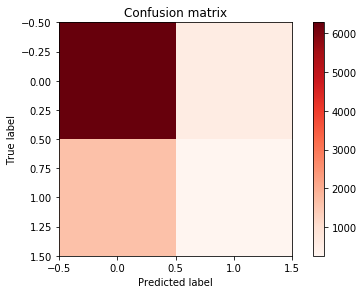

In [103]:
train_score(rfc,X,y)

Text(0,0.5,'TPR')

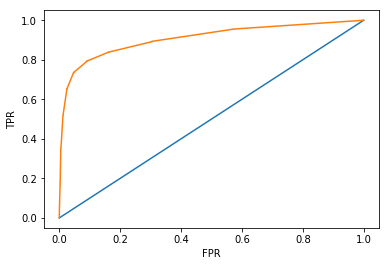

In [104]:
# What about ROC ? 
y_score=rfc.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [105]:
#Random forest classifier
rfc = RandomForestClassifier()
fit = rfc.fit(X_up_train, y_up_train)
yhat_up = fit.predict(X_up_test)
rfc_score = fit.score(X_up_test, y_up_test)
print(rfc_score)

0.848289183223


In [106]:
print(classification_report(yhat_up, y_up_test))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84      8256
          1       0.89      0.82      0.85      9864

avg / total       0.85      0.85      0.85     18120



Training Data Accuracy: 0.99
Test Data Accuracy:     0.87
[[5517 1257]
 [ 544 6272]]


Precision:              0.91
Recall:                 0.81


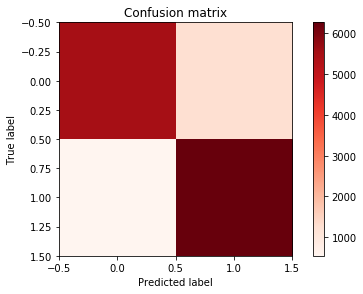

In [107]:
train_score(rfc,X_up,y_up)

Text(0,0.5,'TPR')

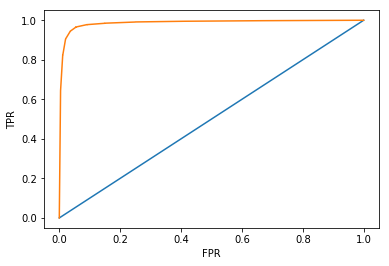

In [108]:
# What about ROC ? 
y_up_score=rfc.predict_proba(X_up_test)[:,1]

fpr_up, tpr_up,_ = roc_curve(y_up_test, y_up_score)
roc_auc_up = auc(fpr_up, tpr_up)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_up,tpr_up)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [109]:
roc_auc

0.98624888511528352

In [74]:
#Random forest classifier
rfc = RandomForestClassifier()
fit = rfc.fit(X_down_train, y_down_train)
yhat_down = fit.predict(X_down_test)
rfc_score = fit.score(X_down_test, y_down_test)
print(rfc_score)

0.579623944743


In [75]:
print(classification_report(yhat_down, y_down_test))

             precision    recall  f1-score   support

          0       0.64      0.57      0.60      2937
          1       0.52      0.59      0.55      2275

avg / total       0.59      0.58      0.58      5212



Training Data Accuracy: 0.97
Test Data Accuracy:     0.57
[[1267  685]
 [1007  950]]


Precision:              0.56
Recall:                 0.65


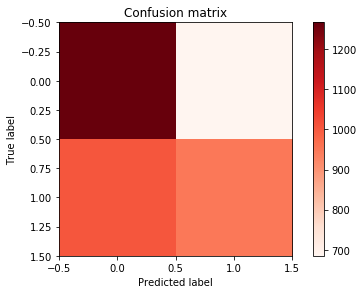

In [76]:
train_score(rfc,X_down,y_down)

Text(0,0.5,'TPR')

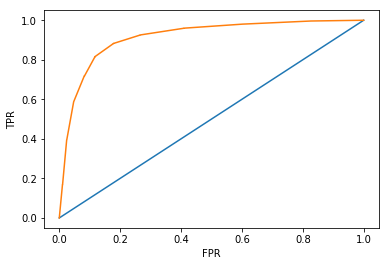

In [77]:
# What about ROC ? 
y_down_score=rfc.predict_proba(X_down_test)[:,1]

fpr_down, tpr_down,_ = roc_curve(y_down_test, y_down_score)
roc_auc_down = auc(fpr_down, tpr_down)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_down,tpr_down)
plt.xlabel('FPR')
plt.ylabel('TPR')

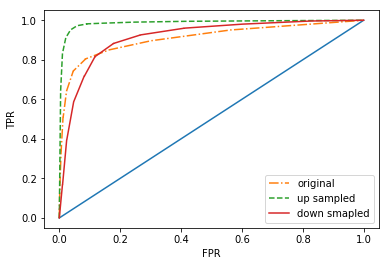

In [78]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label = 'original', linestyle = '-.')
plt.plot(fpr_up,tpr_up, label = 'up sampled', linestyle = '--')
plt.plot(fpr_down,tpr_down, label = 'down smapled')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend();

From the combined roc plot we can see that the up sampled data set is performing much better.  The up-sampled and origional data sets are exactly on top of eachother which is why only one is visible.

In [111]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier



rfc = RandomForestClassifier(max_features= 'sqrt' ,n_estimators=50, max_depth = None, oob_score = True) 

param_grid = { 
    'n_estimators': [10, 100, 500, 750, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,5,10,25,None]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(X_up_test, y_up_test)
print(CV_rfc.best_params_)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ense

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ense

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ense

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ense

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/ense

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}


In [112]:
#Random forest classifier
rfc = RandomForestClassifier(max_features='auto',n_estimators=100)
fit = rfc.fit(X_up_train, y_up_train)
yhat_up = fit.predict(X_up_test)
rfc_score = fit.score(X_up_test, y_up_test)
print(rfc_score)

0.851986754967


In [113]:
print(classification_report(yhat_up, y_up_test))

             precision    recall  f1-score   support

          0       0.79      0.90      0.84      7877
          1       0.92      0.81      0.86     10243

avg / total       0.86      0.85      0.85     18120



Training Data Accuracy: 1.00
Test Data Accuracy:     0.88
[[5499 1275]
 [ 409 6407]]


Precision:              0.93
Recall:                 0.81


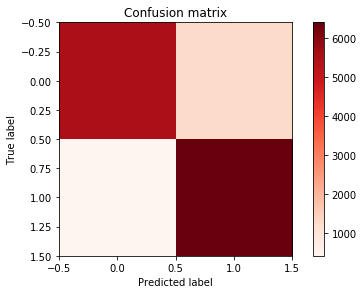

In [114]:
train_score(rfc,X_up,y_up)

Text(0,0.5,'TPR')

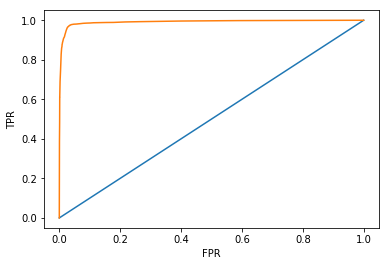

In [115]:
# What about ROC ? 
y_up_score=rfc.predict_proba(X_up_test)[:,1]

fpr_up2, tpr_up2,_ = roc_curve(y_up_test, y_up_score)
roc_auc = auc(fpr_up2, tpr_up2)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_up2,tpr_up2)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [116]:
roc_auc

0.99139619231364362